# 线性回归（多元）

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

## 数据引入

X_train= np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_train[1]

In [5]:
data=np.loadtxt('houses.txt',delimiter=',')
X_train=data[:,0:4]
y_train=data[:,4]

In [6]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

## 成本函数（这里我们使用点积加快运算）

In [7]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost+=(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

## 求w,b的偏导数

In [8]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    d_w=np.zeros((n,))
    d_b=0
    for i in range(m):
        err=np.dot(X[i],w)+b-y[i]
        for j in range(n):
            d_w[j]=d_w[j]+err*X[i,j]
        d_b=d_b+err
    d_w=d_w/m
    d_b=d_b/m
    return d_w,d_b

## 实现梯度下降

In [9]:
def  gradient_descent(X,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    w=copy.deepcopy(w_in)
    b=b_in
    J_History=[]
    for i in range(num_iters):
        d_w,d_b=compute_gradient(X,y,w,b)
        w=w-alpha*d_w
        b=b-alpha*d_b
        if i<100000:      
            J_History.append(cost_function(X, y, w,b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_History[-1]:8.2f}   ")   
    return w, b, J_History

In [49]:
S_w = np.zeros_like(w_init)
S_b = 0
iterations = 1000
alpha = 1.0e-6
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, S_w, S_b, alpha, iterations,compute_cost, compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 96598.21   
Iteration  100: Cost 3921230606149720064.00   
Iteration  200: Cost 161803354719200774325507725459456.00   
Iteration  300: Cost 6676558516433377755418120461972329983314493440.00   
Iteration  400: Cost 275497585947569227897157046700050625130059953903779612459008.00   
Iteration  500: Cost 11367970441077165151635952054501938353561148020598368175543898171439579136.00   
Iteration  600: Cost 469081249858216566690878160827840730284887658735522984159142771837480296721573478400000.00   
Iteration  700: Cost 19355892954600229215783347344316205189703754862254204639672395944178997950420793952049101279766511616.00   
Iteration  800: Cost 798690188923941116009716085438974309219727418510315585590367351806279233988526462865004374241441979405044792950784.00   
Iteration  900: Cost 32956682462524305431702565096422624930169432572415567022394623300556772787126905508380557054136651666194069267342730844358836224.00   
b,w found by gradient descent: -197292396581873620113

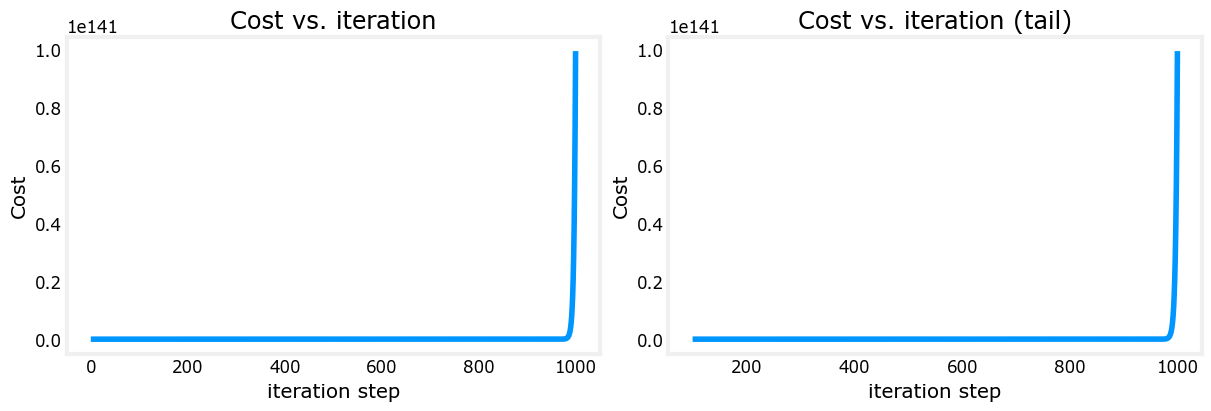

In [50]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## 左图发现降低不够快，而右图又没有趋于稳定所以我们从学习率和数据均一化这两点处理

In [12]:
def zscore_normalize_features(X):
    mu= np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma

In [13]:
X_norm,mu,sigma=zscore_normalize_features(X_train)

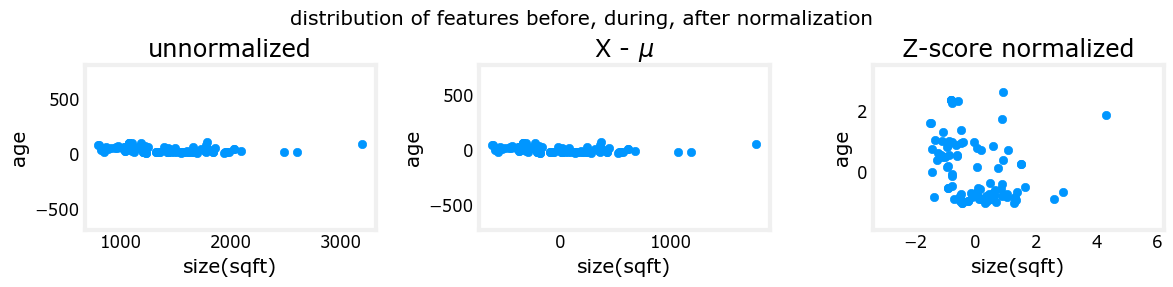

In [19]:
# 手动定义特征标签
feature_labels = ['size(sqft)', 'bedrooms', 'bathrooms', 'age']
x_feature_idx = 0  # 选择第0列（size）作为x轴
y_feature_idx = 3  # 选择第3列（age）作为y轴

# 创建1行3列的子图
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# 子图1：原始数据分布
ax[0].scatter(X_train[:, x_feature_idx], X_train[:, y_feature_idx])
ax[0].set_xlabel(feature_labels[x_feature_idx])
ax[0].set_ylabel(feature_labels[y_feature_idx])
ax[0].set_title("unnormalized")
ax[0].axis('equal')  # 保证坐标轴比例一致

# 子图2：去均值后的数据分布（X - μ）
ax[1].scatter(X_mean[:, x_feature_idx], X_mean[:, y_feature_idx])
ax[1].set_xlabel(feature_labels[x_feature_idx])
ax[1].set_ylabel(feature_labels[y_feature_idx])
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

# 子图3：Z-score标准化后的数据分布
ax[2].scatter(X_norm[:, x_feature_idx], X_norm[:, y_feature_idx])
ax[2].set_xlabel(feature_labels[x_feature_idx])
ax[2].set_ylabel(feature_labels[y_feature_idx])
ax[2].set_title("Z-score normalized")
ax[2].axis('equal')

# 调整布局并添加总标题
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

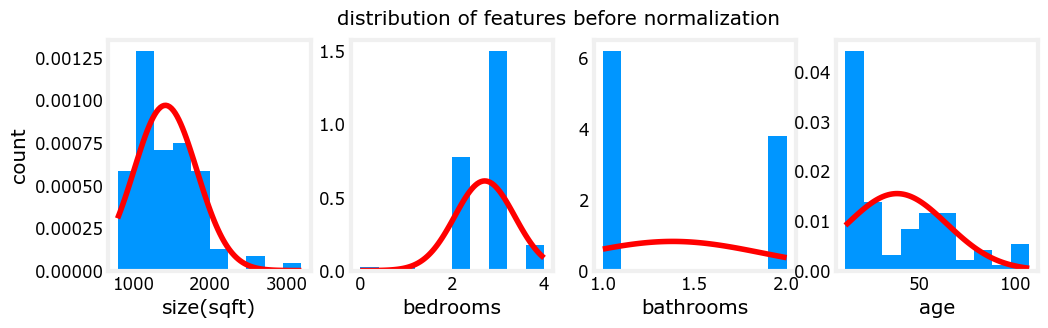

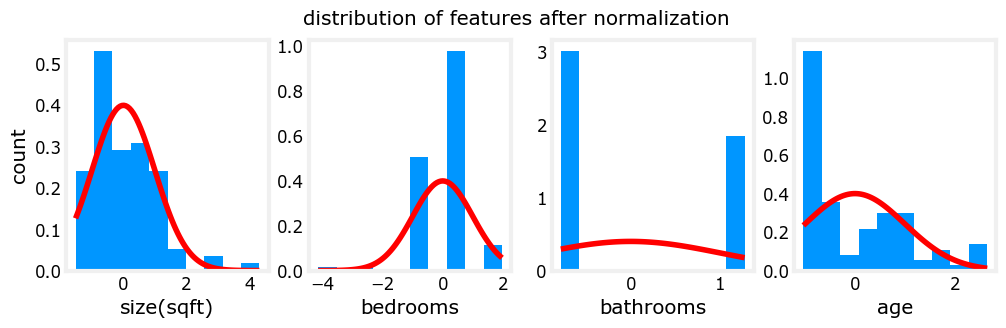

In [23]:
X_features = ['size(sqft)', 'bedrooms', 'bathrooms', 'age']
import scipy.stats as stats
import numpy as np
def norm_plot(ax, data, **kwargs):
    ax.hist(data, density=True, **kwargs)
    mu, sigma = stats.norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    ax.plot(x, stats.norm.pdf(x, mu, sigma), color='red')
    # 绘制标准化前的特征分布
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_train[:, i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features before normalization")
plt.show()

# 绘制标准化后的特征分布
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:, i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features after normalization")
plt.show()

In [61]:
S_w = np.zeros_like(w_init)
S_b = 0
iterations = 1000
alpha = 1.0e-1
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, S_w, S_b, alpha, iterations,compute_cost, compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 57326.42   
Iteration  100: Cost   221.73   
Iteration  200: Cost   219.71   
Iteration  300: Cost   219.71   
Iteration  400: Cost   219.71   
Iteration  500: Cost   219.71   
Iteration  600: Cost   219.71   
Iteration  700: Cost   219.71   
Iteration  800: Cost   219.71   
Iteration  900: Cost   219.71   
b,w found by gradient descent: 362.24,[110.61 -21.47 -32.66 -37.78] 
prediction: 103134.88, target value: 271.5
prediction: 135450.29, target value: 300.0
prediction: 214954.44, target value: 509.8
prediction: 189453.80, target value: 394.0
prediction: 216357.36, target value: 540.0
prediction: 145103.67, target value: 415.0
prediction: 93363.13, target value: 230.0
prediction: 202709.02, target value: 560.0
prediction: 112129.94, target value: 294.0
prediction: 350223.26, target value: 718.2
prediction: 84427.60, target value: 200.0
prediction: 132347.74, target value: 302.0
prediction: 171831.59, target value: 468.0
prediction: 157686.66, target value: 374.2
p

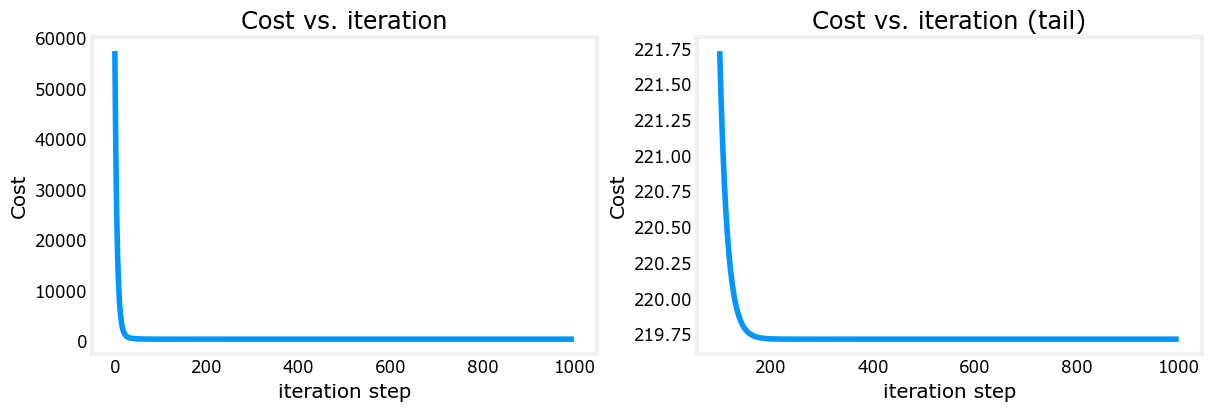

In [62]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

- 经过多次调整alpha的值我们最后得到了比较合理的曲线图，其实还和其实w和b有关，大家可以自行改参数来调节